# Homework 2

CSYE7105 Instructor: Dr. Handan Liu

<b>Name: Anshul Chaudhary</b>
    
<b>NUID: 002820096</b>

### Import statements

In [1]:
import pandas as pd
import numpy as np
import multiprocessing as mp
import time
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

### Part 1: 10 points

##### Q1. Create a Pandas DataFrame df, for the values [0,100) with a seed 1, its shape is (20,000,200).             [2 points]

In [2]:
# set seed to 1
np.random.seed(1)

# initialize the data in a 2d array
data = np.random.randint(0, 100, size=(20000, 200))

# create a dataframe from data
df = pd.DataFrame(data)

In [3]:
# display df shape
df.shape

(20000, 200)

In [4]:
# display head
df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,37,12,72,9,75,5,79,64,16,1,...,53,69,36,21,40,77,91,49,47,77
1,40,78,45,87,16,28,45,67,66,78,...,88,93,76,82,11,36,16,30,84,57
2,35,41,81,2,85,93,36,46,80,27,...,36,29,39,28,54,29,55,90,27,60
3,12,17,71,91,7,83,56,51,32,76,...,21,74,21,33,38,37,43,33,95,41
4,71,69,70,23,86,39,31,37,38,56,...,39,3,57,43,53,43,74,98,97,75


##### Q2. Normalize all columns of this df by subtracting the column mean and dividing by standard deviation. And set a timer to calculate this function. [4 points]

###### Method 1 - using df calculations

In [5]:
# initialize time
start_time = time.time()

# mean and std
means = df.mean(axis=0)
stds = df.std(axis=0) 

# subtract mean and divide standard deviation
df_n = (df - means) / stds

# calculate time taken
time_n = time.time() - start_time

In [6]:
print("Time Taken to Normalize Method 1: ", time_n)

Time Taken to Normalize Method 1:  0.06775116920471191


In [7]:
# display normailized head
df_n.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.441316,-1.296265,0.777541,-1.403266,0.866680,-1.528929,1.021315,0.502320,-1.153580,-1.679439,...,0.119883,0.663837,-0.461409,-0.989387,-0.329302,0.956994,1.434785,-0.012654,-0.086080,0.954392
1,-0.337515,0.978561,-0.156515,1.288086,-1.161000,-0.737627,-0.163384,0.606396,0.579079,1.001399,...,1.334044,1.491703,0.930337,1.126697,-1.335898,-0.464473,-1.167345,-0.668730,1.195781,0.259732
2,-0.510516,-0.296720,1.088893,-1.644798,1.210355,1.498664,-0.476981,-0.122137,1.064224,-0.774221,...,-0.469853,-0.715941,-0.357028,-0.746558,0.156640,-0.707162,0.185763,1.403090,-0.778978,0.363931
3,-1.306325,-1.123930,0.742946,1.426105,-1.470307,1.154619,0.219901,0.051323,-0.599129,0.931767,...,-0.990207,0.836309,-0.983314,-0.573108,-0.398723,-0.429803,-0.230578,-0.565139,1.576874,-0.295996
4,0.735097,0.668358,0.708352,-0.920203,1.244722,-0.359178,-0.651201,-0.434365,-0.391210,0.235445,...,-0.365782,-1.612796,0.269258,-0.226209,0.121930,-0.221784,0.844969,1.679333,1.646164,0.884926


###### Method 2 - using loops

In [8]:
# initialize time
start_time = time.time()

# initialize dict
normalized_data = {}

for column in df.columns:
    # column mean
    mean = df[column].mean() 
    # column std
    std = df[column].std()
    # normalize column
    normalized_data[column] = (df[column] - mean) / std

# Create a DataFrame from the normalized data
df_n_loop = pd.DataFrame(normalized_data)
# calculate time taken
time_n_loop = time.time() - start_time

In [9]:
print("Time Taken to Normalize Method 2: ", time_n_loop)

Time Taken to Normalize Method 2:  0.19090723991394043


In [10]:
# display normailized head
df_n_loop.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.441316,-1.296265,0.777541,-1.403266,0.866680,-1.528929,1.021315,0.502320,-1.153580,-1.679439,...,0.119883,0.663837,-0.461409,-0.989387,-0.329302,0.956994,1.434785,-0.012654,-0.086080,0.954392
1,-0.337515,0.978561,-0.156515,1.288086,-1.161000,-0.737627,-0.163384,0.606396,0.579079,1.001399,...,1.334044,1.491703,0.930337,1.126697,-1.335898,-0.464473,-1.167345,-0.668730,1.195781,0.259732
2,-0.510516,-0.296720,1.088893,-1.644798,1.210355,1.498664,-0.476981,-0.122137,1.064224,-0.774221,...,-0.469853,-0.715941,-0.357028,-0.746558,0.156640,-0.707162,0.185763,1.403090,-0.778978,0.363931
3,-1.306325,-1.123930,0.742946,1.426105,-1.470307,1.154619,0.219901,0.051323,-0.599129,0.931767,...,-0.990207,0.836309,-0.983314,-0.573108,-0.398723,-0.429803,-0.230578,-0.565139,1.576874,-0.295996
4,0.735097,0.668358,0.708352,-0.920203,1.244722,-0.359178,-0.651201,-0.434365,-0.391210,0.235445,...,-0.365782,-1.612796,0.269258,-0.226209,0.121930,-0.221784,0.844969,1.679333,1.646164,0.884926


##### Q3. Compute the correlation of each row of df with its succeeding row. And set a timer to calculate this function. [4 points]

In [11]:
# initialize time
start_time = time.time()

# calculate the correlation between each row and its succeeding row
correlations = df[:-1].apply(lambda row: row.corr(df.iloc[row.name + 1]), axis=1)

# calculate time taken
time_c = time.time() - start_time

In [12]:
print("Time Taken for correlations: ", time_c)

Time Taken for correlations:  6.060779094696045


In [13]:
# display correlations head
correlations.head()

0   -0.135114
1   -0.066559
2    0.126696
3   -0.054183
4   -0.038604
dtype: float64

### Part 2: 45 points

##### Q1. Define a function “part2” to do the same thing of Part1-Q2.  [4 points]

In [14]:
def part2(column_data):
    # Calculate the mean
    mean = column_data.mean()  
    # Calculate the standard deviation
    std = column_data.std()         
    return (column_data - mean) / std

##### Q2. Parallelize this function “part2”:                       [12 points]

###### Q2.1 Use multiprocessing.Pool method (map or starmap) to parallelize the function “part2”.            [2pt]

In [15]:
def parallel_normalize(df_input, num_cpus):
    with mp.Pool(num_cpus) as pool:
        # use pool.map to apply part2 to each column
        normalized_chunks = pool.map(part2, [df_input[column] for column in df_input.columns])
        # transpose the result to create a DataFrame with the same shape as df
        res = pd.DataFrame(normalized_chunks).T
    return res

###### Q2.2 Set a timer to calculate the wall-clock time for the parallelized code when the number of CPUs is 2, 4, 6, and 8, respectively.                  [4pt]

In [16]:
cpu_counts = [1, 2, 4, 6, 8]
timings = []
for cpus in cpu_counts:
    start_time = time.time()
    df_normalized = parallel_normalize(df, cpus)
    elapsed_time = time.time() - start_time
    timings.append(elapsed_time)
    print(f"Time taken with {cpus} CPUs: {elapsed_time:.4f} seconds")

Time taken with 1 CPUs: 0.6386 seconds
Time taken with 2 CPUs: 0.4115 seconds
Time taken with 4 CPUs: 0.4630 seconds
Time taken with 6 CPUs: 0.4184 seconds
Time taken with 8 CPUs: 0.4198 seconds


###### Q2.3 Use matplotlib (or other Python tools) to plot the 3 graphs: wall-clock time, speedup and efficiency respectively as the number of CPUs increases.       [3pt]

In [17]:
# Calculate speedup and efficiency
speedup = [timings[0] / t for t in timings]
efficiency = [s / cpus for s, cpus in zip(speedup, cpu_counts)]

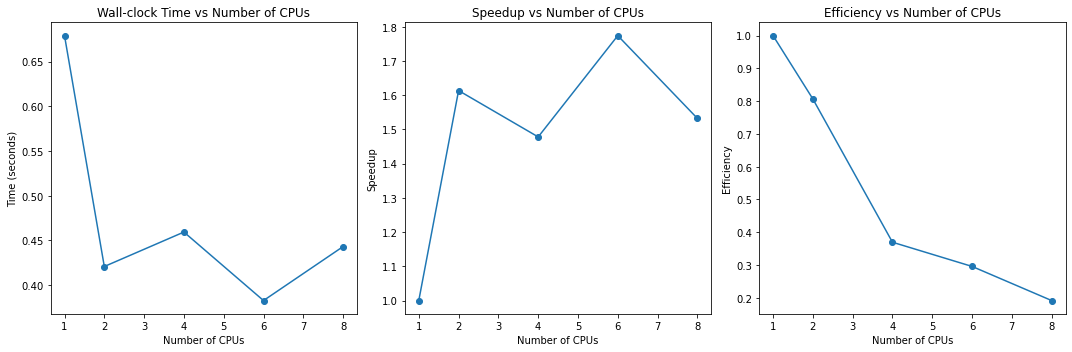

In [18]:
# Plotting
plt.figure(figsize=(15, 5))

# Wall-clock time plot
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, timings, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')


plt.suptitle('Performance Metrics for Chunk Size 10', fontsize=16)
plt.tight_layout()
plt.show()


###### Q2.4 Save these 3 graphs as 3 image files.        [3pt]

In [35]:
# Wall-clock time plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, timings, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('normalization_wall_clock_time_with_map.png')
plt.close()

# Speedup plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, speedup, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.savefig('normalization_speedup_with_map.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, efficiency, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('normalization_efficiency_with_map.png')
plt.close()

##### Q3. Use multiprocessing.Pool imap to set 2 different chunk size to parallelize the function “part2” [2pt] and do the same things as for Q2.2[4pt], Q2.3[3pt] and Q2.4[3pt].         [12 points]

In [20]:
def parallel_normalization_imap(df_input, num_cpus, chunk_size):
    pool = mp.Pool(num_cpus)
    normalized_columns = pool.imap(part2, [df_input[column] for column in df_input.columns], chunksize=chunk_size)
    pool.close()
    pool.join()
    return pd.DataFrame(normalized_columns).T

In [21]:
chunk_sizes = [10, 50]
cpus = 2
timings_imap = {}
for chunk in chunk_sizes:
    start_time = time.time()
    df_normalized = parallel_normalization_imap(df, cpus, chunk)
    elapsed_time = time.time() - start_time
    timings_imap[chunk] = elapsed_time
    print(f"Time taken with chunk size {chunk}: {elapsed_time:.4f} seconds")

Time taken with chunk size 10: 0.3677 seconds
Time taken with chunk size 50: 0.4883 seconds


###### Q3.2 - same as (Set a timer to calculate the wall-clock time for the parallelized code when the number of CPUs is 2, 4, 6, and 8, respectively.)

In [146]:
from collections import defaultdict

chunk_sizes = [10, 50]
cpu_counts = [1, 2, 4, 6, 8]
timings_imap = defaultdict(list)
for chunk in chunk_sizes:
    for cpus in cpu_counts:
        start_time = time.time()
        df_normalized = parallel_normalization_imap(df, cpus, chunk)
        elapsed_time = time.time() - start_time
        timings_imap[chunk].append(elapsed_time)
        print(f"Time taken with {cpus} CPU & chunk size {chunk}: {elapsed_time:.4f} seconds")

Time taken with 1 CPU & chunk size 10: 0.4790 seconds
Time taken with 2 CPU & chunk size 10: 0.5450 seconds
Time taken with 4 CPU & chunk size 10: 0.4247 seconds
Time taken with 6 CPU & chunk size 10: 0.3950 seconds
Time taken with 8 CPU & chunk size 10: 0.4257 seconds
Time taken with 1 CPU & chunk size 50: 0.5472 seconds
Time taken with 2 CPU & chunk size 50: 0.4598 seconds
Time taken with 4 CPU & chunk size 50: 0.6943 seconds
Time taken with 6 CPU & chunk size 50: 0.5685 seconds
Time taken with 8 CPU & chunk size 50: 0.4959 seconds


###### Q3.3 - same as (Use matplotlib (or other Python tools) to plot the 3 graphs: wall-clock time, speedup and efficiency respectively as the number of CPUs increases.)

In [147]:
# Calculate speedup and efficiency chunk size 10
speedup_chunk_10 = [timings_imap[chunk_sizes[0]][0] / t for t in timings_imap[chunk_sizes[0]]]
efficiency_chunk_10 = [s / cpus for s, cpus in zip(speedup_chunk_10, cpu_counts)]

In [148]:
# Calculate speedup and efficiency chunk size 50
speedup_chunk_50 = [timings_imap[chunk_sizes[1]][0] / t for t in timings_imap[chunk_sizes[1]]]
efficiency_chunk_50 = [s / cpus for s, cpus in zip(speedup_chunk_50, cpu_counts)]

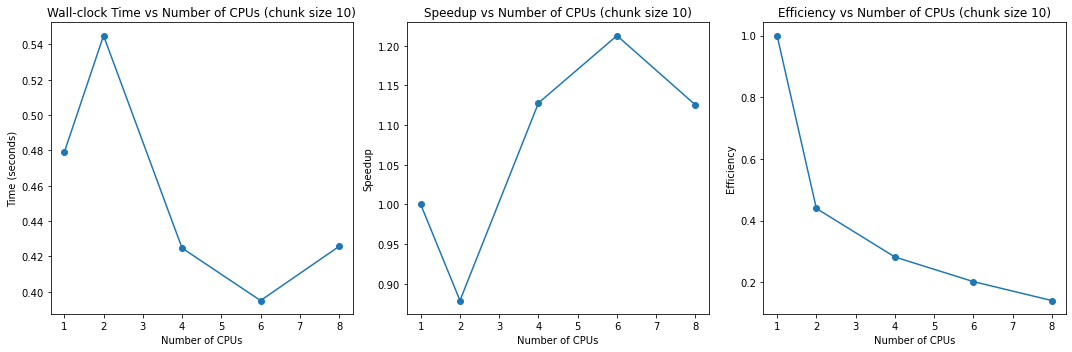

In [149]:
# plot for chunk size 10
# Plotting
plt.figure(figsize=(15, 5))

# Wall-clock time plot
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, timings_imap[chunk_sizes[0]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup_chunk_10, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency_chunk_10, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.tight_layout()
plt.show()

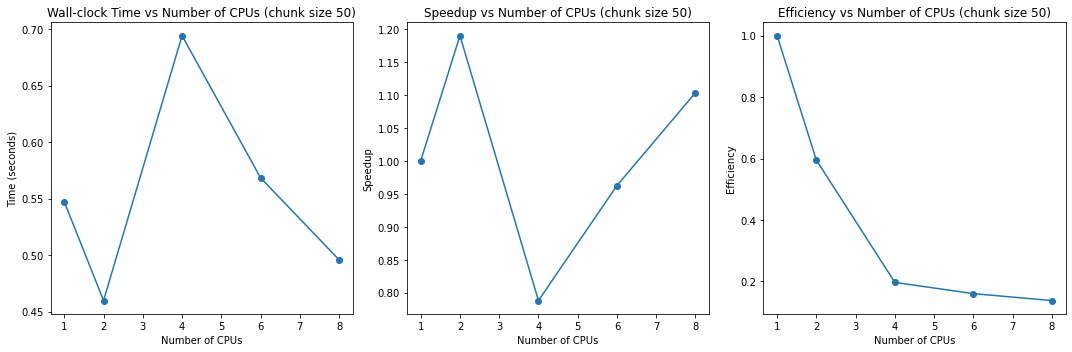

In [150]:
# plot for chunk size 50
# Plotting
plt.figure(figsize=(15, 5))

# Wall-clock time plot
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, timings_imap[chunk_sizes[1]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup_chunk_50, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency_chunk_50, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.tight_layout()
plt.show()

###### Q3.4 same as - (Save these 3 graphs as 3 image files.        [3pt])

In [151]:
# for chunk size of 10

# Wall-clock time plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, timings_imap[chunk_sizes[0]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('normalization_wall_clock_time_with_imap_chunk_10.png')
plt.close()

# Speedup plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, speedup_chunk_10, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.savefig('normalization_speedup_with_imap_chunk_10.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, efficiency_chunk_10, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('normalization_efficiency_imap_chunk_10.png')
plt.close()

In [152]:
# for chunk size of 50

# Wall-clock time plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, timings_imap[chunk_sizes[1]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('normalization_wall_clock_time_with_imap_chunk_50.png')
plt.close()

# Speedup plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, speedup_chunk_50, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.savefig('normalization_speedup_with_imap_chunk_50.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, efficiency_chunk_50, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('normalization_efficiency_imap_chunk_50.png')
plt.close()

##### Q4. Select the better performance of the chunk-size in Q3, compare the performance (time, speedup and efficiency) with Q2 (combining together), and do the same things (plots and image files) as for Q2.3 and Q2.4.                [6 points]

Chunk size of 10 is better performing, as we can see from the 2 figures above. 

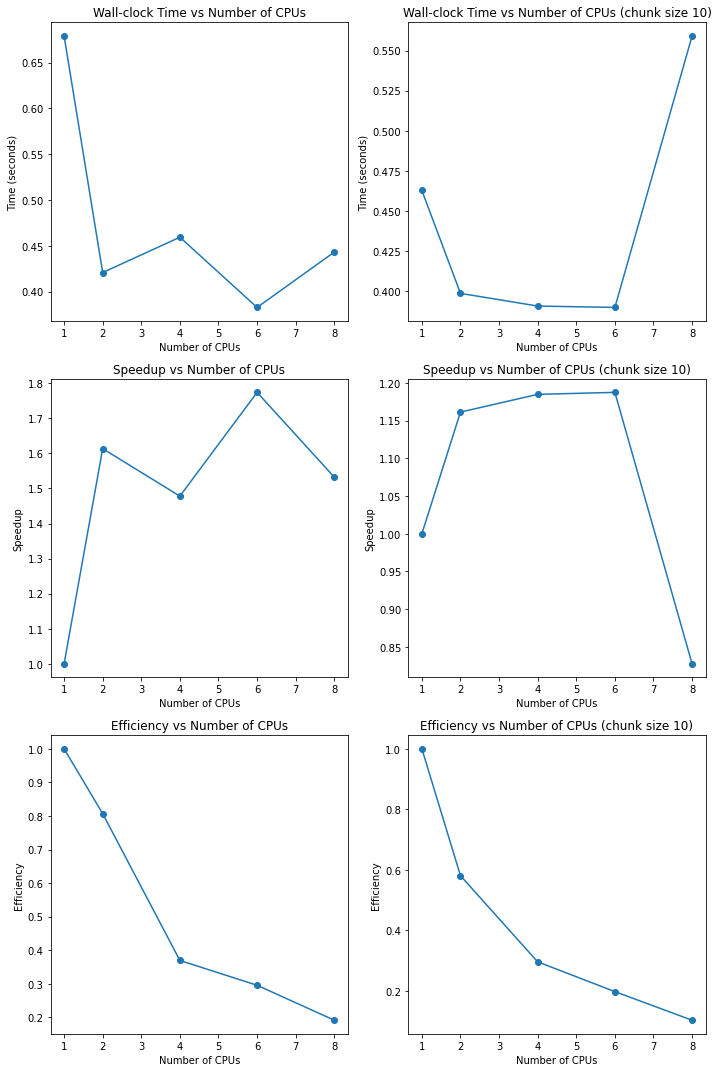

In [63]:
plt.figure(figsize=(10, 15))

# Wall-clock time plot
plt.subplot(3, 2, 1)
plt.plot(cpu_counts, timings, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

plt.subplot(3, 2, 2)
plt.plot(cpu_counts, timings_imap[chunk_sizes[0]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(3, 2, 3)
plt.plot(cpu_counts, speedup, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

plt.subplot(3, 2, 4)
plt.plot(cpu_counts, speedup_chunk_10, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(3, 2, 5)
plt.plot(cpu_counts, efficiency, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.subplot(3, 2, 6)
plt.plot(cpu_counts, efficiency_chunk_10, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.tight_layout()
plt.show()

In [64]:
# Wall-clock time plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cpu_counts, timings, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

plt.subplot(1, 2, 2)
plt.plot(cpu_counts, timings_imap[chunk_sizes[0]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('normalization_wall_clock_compare.png')
plt.close()

# Speedup plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cpu_counts, speedup, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

plt.subplot(1, 2, 2)
plt.plot(cpu_counts, speedup_chunk_10, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

plt.savefig('normalization_speedup_compare.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cpu_counts, efficiency, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.subplot(1, 2, 2)
plt.plot(cpu_counts, efficiency_chunk_10, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('normalization_efficiency_compare.png')
plt.close()

### Part 3: 45 points

##### Q1. Define a function “part3” to do the same thing of Part1-Q3.  [4 points]

In [110]:
def part3(row):
    row1, row2 = row
    return row1.corr(row2)

##### Q2. Parallelize this function “part3”:                       [12 points]

###### Q2.1 Use multiprocessing.Pool method (map or starmap) to parallelize the function “part2”.            [2pt]

In [111]:
def parallel_correlation(df_input, num_cpus):
    with mp.Pool(num_cpus) as pool:
        correlations = pool.map(part3, [(df_input.iloc[i], df_input.iloc[i+1]) for i in range(len(df_input) - 1)])
    return correlations

###### Q2.2 Set a timer to calculate the wall-clock time for the parallelized code when the number of CPUs is 2, 4, 6, and 8, respectively.                  [4pt]

In [112]:
cpu_counts = [1, 2, 4, 6, 8]
timings_corr = []

for cpus in cpu_counts:
    start_time = time.time()
    df_correlation = parallel_correlation(df, cpus)
    elapsed_time = time.time() - start_time
    timings_corr.append(elapsed_time)
    print(f"Time taken with {cpus} CPUs: {elapsed_time:.4f} seconds")

Time taken with 1 CPUs: 11.4637 seconds
Time taken with 2 CPUs: 7.6558 seconds
Time taken with 4 CPUs: 6.0682 seconds
Time taken with 6 CPUs: 5.6793 seconds
Time taken with 8 CPUs: 5.6944 seconds


###### Q2.3 Use matplotlib (or other Python tools) to plot the 3 graphs: wall-clock time, speedup and efficiency respectively as the number of CPUs increases.       [3pt]

In [113]:
# Calculate speedup and efficiency
speedup_corr = [timings_corr[0] / t for t in timings_corr]
efficiency_corr = [s / cpus for s, cpus in zip(speedup_corr, cpu_counts)]

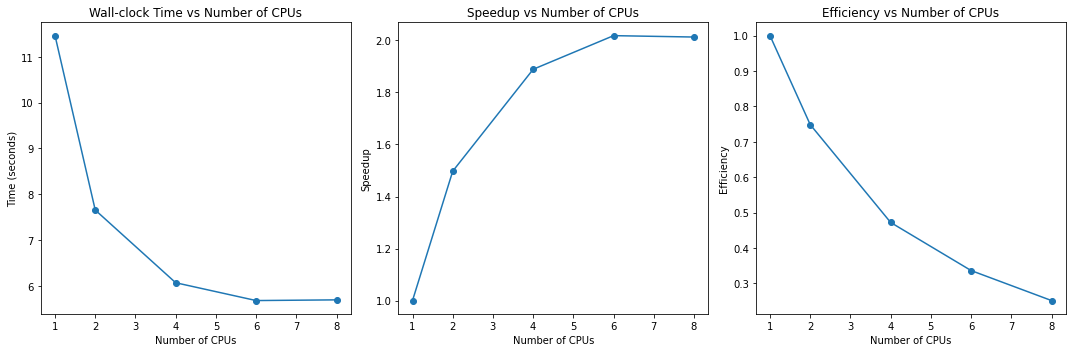

In [114]:
# Plotting
plt.figure(figsize=(15, 5))

# Wall-clock time plot
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, timings_corr, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup_corr, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency_corr, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.tight_layout()
plt.show()


###### Q2.4 Save these 3 graphs as 3 image files.        [3pt]

In [115]:
# Wall-clock time plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, timings_corr, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('correlation_wall_clock_time_with_map.png')
plt.close()

# Speedup plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, speedup_corr, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.savefig('correlation_speedup_with_map.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, efficiency_corr, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('correlation_efficiency_with_map.png')
plt.close()


##### Q3. Use multiprocessing.Pool imap to set 2 different chunk size to parallelize the function “part2” [2pt] and do the same things as for Q2.2[4pt], Q2.3[3pt] and Q2.4[3pt].         [12 points]

In [116]:
def parallel_correlation_imap(df_input, num_cpus, chunk_size):
    pool = mp.Pool(num_cpus)
    correlations = pool.imap(part3, [(df_input.iloc[i], df_input.iloc[i+1]) for i in range(len(df_input) - 1)], chunksize=chunk_size)
    correlations = list(correlations)
    pool.close()
    pool.join()
    return correlations

In [119]:
chunk_sizes = [10, 50]
cpus = 2
timings_imap_corr = {}
for chunk in chunk_sizes:
    start_time = time.time()
    df_correlation = parallel_correlation_imap(df, cpus, chunk)
    elapsed_time = time.time() - start_time
    timings_imap_corr[chunk] = elapsed_time
    print(f"Time taken with chunk size {chunk}: {elapsed_time:.4f} seconds")

Time taken with chunk size 10: 7.7954 seconds
Time taken with chunk size 50: 6.6590 seconds


###### Q3.2 - same as (Set a timer to calculate the wall-clock time for the parallelized code when the number of CPUs is 2, 4, 6, and 8, respectively.)

In [120]:
from collections import defaultdict

chunk_sizes = [10, 50]
cpu_counts = [1, 2, 4, 6, 8]
timings_imap_corr = defaultdict(list)
for chunk in chunk_sizes:
    for cpus in cpu_counts:
        start_time = time.time()
        df_correlation = parallel_correlation_imap(df, cpus, chunk)
        elapsed_time = time.time() - start_time
        timings_imap_corr[chunk].append(elapsed_time)
        print(f"Time taken with {cpus} CPU & chunk size {chunk}: {elapsed_time:.4f} seconds")

Time taken with 1 CPU & chunk size 10: 10.8752 seconds
Time taken with 2 CPU & chunk size 10: 7.3835 seconds
Time taken with 4 CPU & chunk size 10: 5.1149 seconds
Time taken with 6 CPU & chunk size 10: 4.5350 seconds
Time taken with 8 CPU & chunk size 10: 4.9565 seconds
Time taken with 1 CPU & chunk size 50: 9.8916 seconds
Time taken with 2 CPU & chunk size 50: 6.1938 seconds
Time taken with 4 CPU & chunk size 50: 5.0194 seconds
Time taken with 6 CPU & chunk size 50: 5.1536 seconds
Time taken with 8 CPU & chunk size 50: 4.5107 seconds


###### Q3.3 - same as (Use matplotlib (or other Python tools) to plot the 3 graphs: wall-clock time, speedup and efficiency respectively as the number of CPUs increases.)

In [121]:
# Calculate speedup and efficiency chunk size 10
speedup_corr_chunk_10 = [timings_imap_corr[chunk_sizes[0]][0] / t for t in timings_imap_corr[chunk_sizes[0]]]
efficiency_corr_chunk_10 = [s / cpus for s, cpus in zip(speedup_corr_chunk_10, cpu_counts)]

In [122]:
# Calculate speedup and efficiency chunk size 50
speedup_corr_chunk_50 = [timings_imap_corr[chunk_sizes[1]][0] / t for t in timings_imap_corr[chunk_sizes[1]]]
efficiency_corr_chunk_50 = [s / cpus for s, cpus in zip(speedup_corr_chunk_50, cpu_counts)]

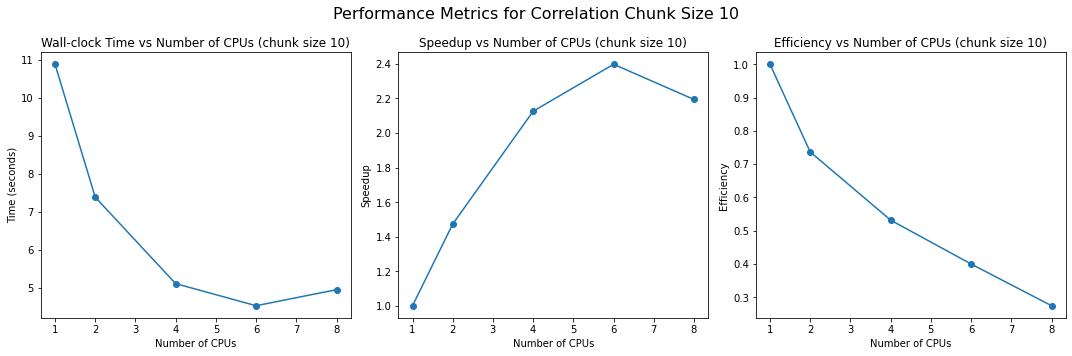

In [125]:
# plot for chunk size 10
# Plotting
plt.figure(figsize=(15, 5))

# Wall-clock time plot
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, timings_imap_corr[chunk_sizes[0]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup_corr_chunk_10, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency_corr_chunk_10, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')


plt.suptitle('Performance Metrics for Correlation Chunk Size 10', fontsize=16)
plt.tight_layout()
plt.show()

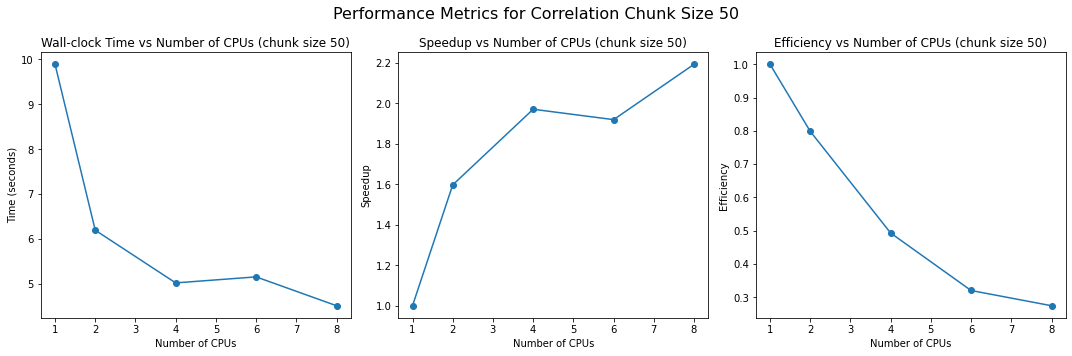

In [126]:
# plot for chunk size 50
# Plotting
plt.figure(figsize=(15, 5))

# Wall-clock time plot
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, timings_imap_corr[chunk_sizes[1]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup_corr_chunk_50, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency_corr_chunk_50, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')


plt.suptitle('Performance Metrics for Correlation Chunk Size 50', fontsize=16)
plt.tight_layout()
plt.show()

###### Q3.4 same as - (Save these 3 graphs as 3 image files.        [3pt])

In [127]:
# for chunk size of 10

# Wall-clock time plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, timings_imap_corr[chunk_sizes[0]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('correlation_wall_clock_time_with_imap_chunk_10.png')
plt.close()

# Speedup plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, speedup_corr_chunk_10, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.savefig('correlation_speedup_with_imap_chunk_10.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, efficiency_corr_chunk_10, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('correlation_efficiency_imap_chunk_10.png')
plt.close()

In [128]:
# for chunk size of 50

# Wall-clock time plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, timings_imap_corr[chunk_sizes[1]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('correlation_wall_clock_time_with_imap_chunk_50.png')
plt.close()

# Speedup plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, speedup_corr_chunk_50, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.savefig('correlation_speedup_with_imap_chunk_50.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, efficiency_corr_chunk_50, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('correlation_efficiency_imap_chunk_50.png')
plt.close()

##### Q4. Select the better performance of the chunk-size in Q3, compare the performance (time, speedup and efficiency) with Q2 (combining together), and do the same things (plots and image files) as for Q2.3 and Q2.4.                [6 points]

Chunk size of 50 is better performing, as we can see from the two figures above. 

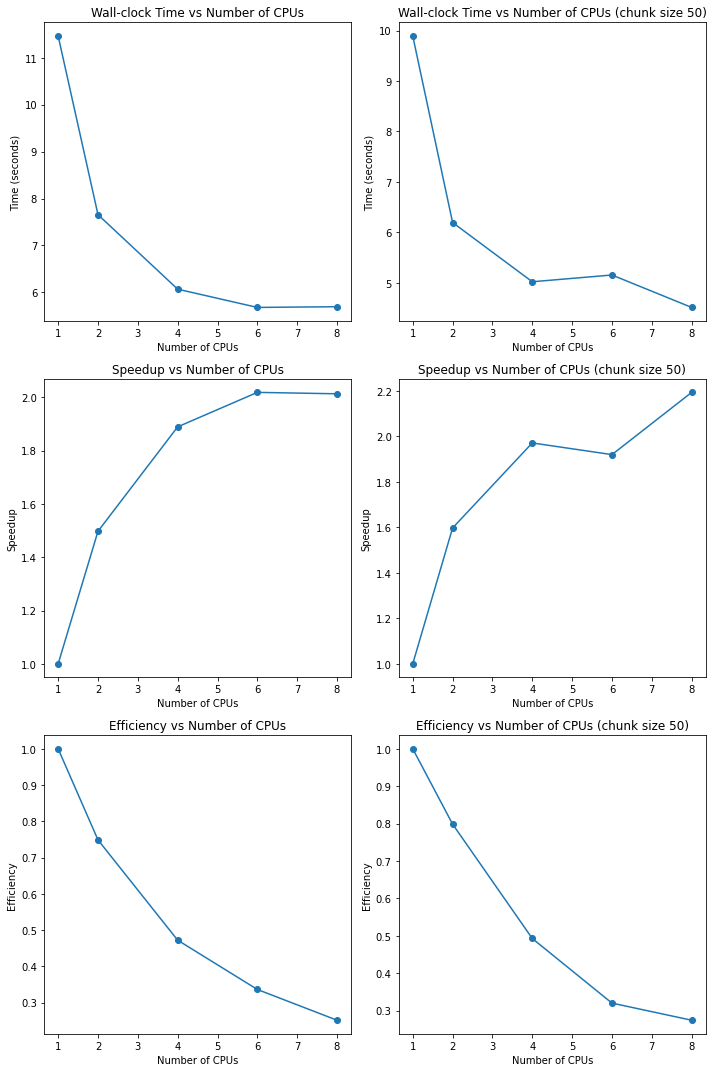

In [155]:
plt.figure(figsize=(10, 15))

# Wall-clock time plot
plt.subplot(3, 2, 1)
plt.plot(cpu_counts, timings_corr, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

plt.subplot(3, 2, 2)
plt.plot(cpu_counts, timings_imap_corr[chunk_sizes[1]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(3, 2, 3)
plt.plot(cpu_counts, speedup_corr, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

plt.subplot(3, 2, 4)
plt.plot(cpu_counts, speedup_corr_chunk_50, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(3, 2, 5)
plt.plot(cpu_counts, efficiency_corr, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.subplot(3, 2, 6)
plt.plot(cpu_counts, efficiency_corr_chunk_50, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.tight_layout()
plt.show()

In [156]:
# Wall-clock time plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cpu_counts, timings_corr, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

plt.subplot(1, 2, 2)
plt.plot(cpu_counts, timings_imap_corr[chunk_sizes[1]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('correlation_wall_clock_compare.png')
plt.close()

# Speedup plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cpu_counts, speedup_corr, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

plt.subplot(1, 2, 2)
plt.plot(cpu_counts, speedup_corr_chunk_50, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

plt.savefig('correlation_speedup_compare.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cpu_counts, efficiency_corr, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.subplot(1, 2, 2)
plt.plot(cpu_counts, efficiency_corr_chunk_50, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('correlation_efficiency_compare.png')
plt.close()